In [21]:
import tensorflow as tf
import numpy as np

In [22]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

(60000, 28, 28) (60000,)


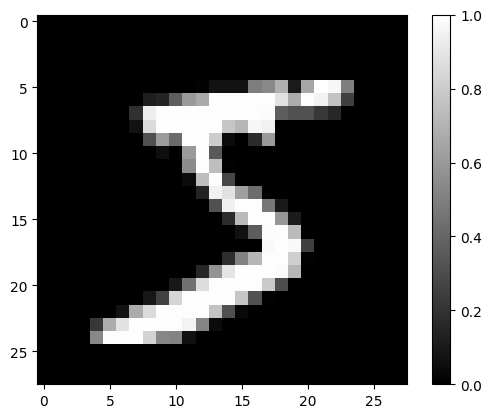

5


In [23]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [25]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0506
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0172
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0118
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0098
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0086
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0079
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0073
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0069
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0066
Epoch 10/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0063


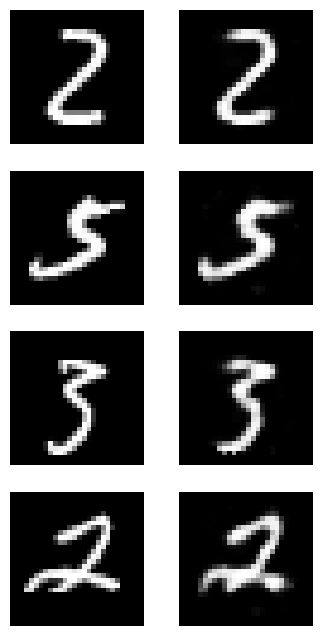

313/313 [==============================] - 1s 3ms/step - loss: 0.0061


0.006073901895433664

In [28]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

In [29]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                200768    
                                                                 
 dense_4 (Dense)             (None, 3136)              203840    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)      

In [30]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 10s 38ms/step - loss: 0.0792
Epoch 2/20
235/235 [==============================] - 9s 39ms/step - loss: 0.0271
Epoch 3/20
235/235 [==============================] - 10s 41ms/step - loss: 0.0199
Epoch 4/20
235/235 [==============================] - 13s 57ms/step - loss: 0.0179
Epoch 5/20
235/235 [==============================] - 15s 62ms/step - loss: 0.0169
Epoch 6/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0163
Epoch 7/20
235/235 [==============================] - 15s 62ms/step - loss: 0.0159
Epoch 8/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0156
Epoch 9/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0154
Epoch 10/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0152
Epoch 11/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0150
Epoch 12/20
235/235 [==============================] - 14s 60ms/step - loss: 0.0149
Ep

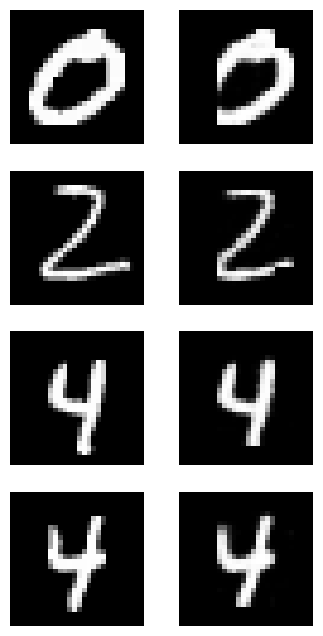

313/313 [==============================] - 1s 4ms/step - loss: 0.0140


0.013965249992907047

In [31]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

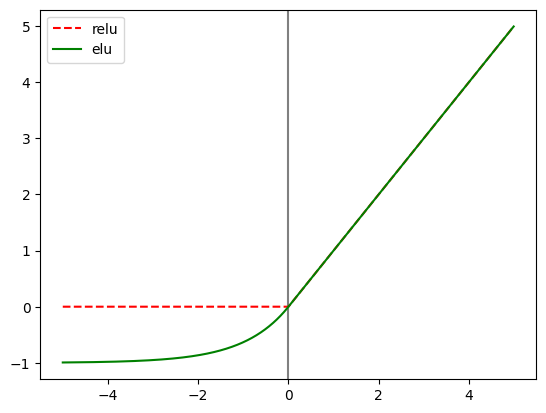

In [32]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [34]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 15s 60ms/step - loss: 0.0785
Epoch 2/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0337
Epoch 3/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0258
Epoch 4/20
235/235 [==============================] - 15s 63ms/step - loss: 0.0235
Epoch 5/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0225
Epoch 6/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0218
Epoch 7/20
235/235 [==============================] - 14s 60ms/step - loss: 0.0214
Epoch 8/20
235/235 [==============================] - 15s 63ms/step - loss: 0.0210
Epoch 9/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0208
Epoch 10/20
235/235 [==============================] - 14s 60ms/step - loss: 0.0205
Epoch 11/20
235/235 [==============================] - 14s 61ms/step - loss: 0.0204
Epoch 12/20
235/235 [==============================] - 14s 60ms/step - loss: 0.0203
E

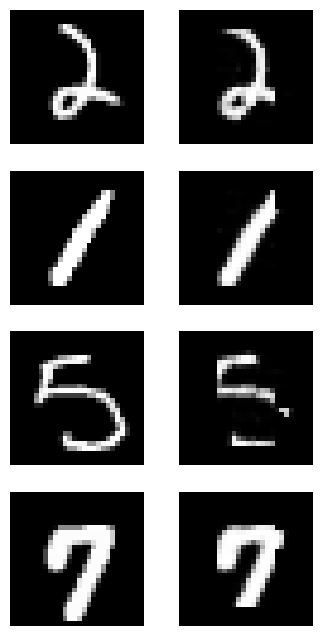

313/313 [==============================] - 1s 4ms/step - loss: 0.0175


0.017504015937447548

In [35]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

model.evaluate(test_X, test_X)

In [37]:
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

(60000, 64)
[30.858543    0.         17.806442   18.163385   22.542048   41.05646
 21.249937    7.483829   27.083584   36.284267    7.3837247  37.38497
  5.254241   30.702738    0.         28.381636   38.960186   23.010178
 38.954      17.829021   44.0075     26.693819   22.336754   14.313314
 23.547209   26.904016   36.068222   24.978662    0.41819435 24.802786
 53.98149    31.200766   33.177868   32.109623   44.690628    0.
 25.586033   13.681182   36.580296   19.420176   32.101387   24.257938
 31.980116   38.855606   46.53458    20.384777   43.56339    32.733425
 24.914333   23.36394    26.33358    30.406513   29.927626    0.
 35.616566   35.75098     0.         37.161686   33.611958    6.174344
 20.481266   48.158188   20.666618   46.12357   ]


In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [40]:
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[2 6 8 ... 8 8 8]
(10, 64)
[27.185688  0.       46.046165 26.117554 25.869293 28.533287 26.937908
 22.675009 29.916199 29.236372 31.0534   35.282875 34.175526 30.984844
  0.       44.164307 36.00575  18.472971 24.271446 28.368    32.077534
 20.949474 29.356243 39.87979  26.571394 34.20386  26.239807 36.921738
 28.897694 36.98766  38.319824 41.016525 22.774078 23.89017  26.995928
  0.       22.595078 20.088924 29.210619 37.865402 34.53004  30.598864
 33.169567 29.881346 42.004646 32.678383 38.124176 39.32673  35.518055
 25.98164  25.792696 30.611977 25.364723  0.       37.776947 33.8761
  0.       35.338223 32.025524 26.56084  33.21055  30.217648 24.513386
 37.48315 ]


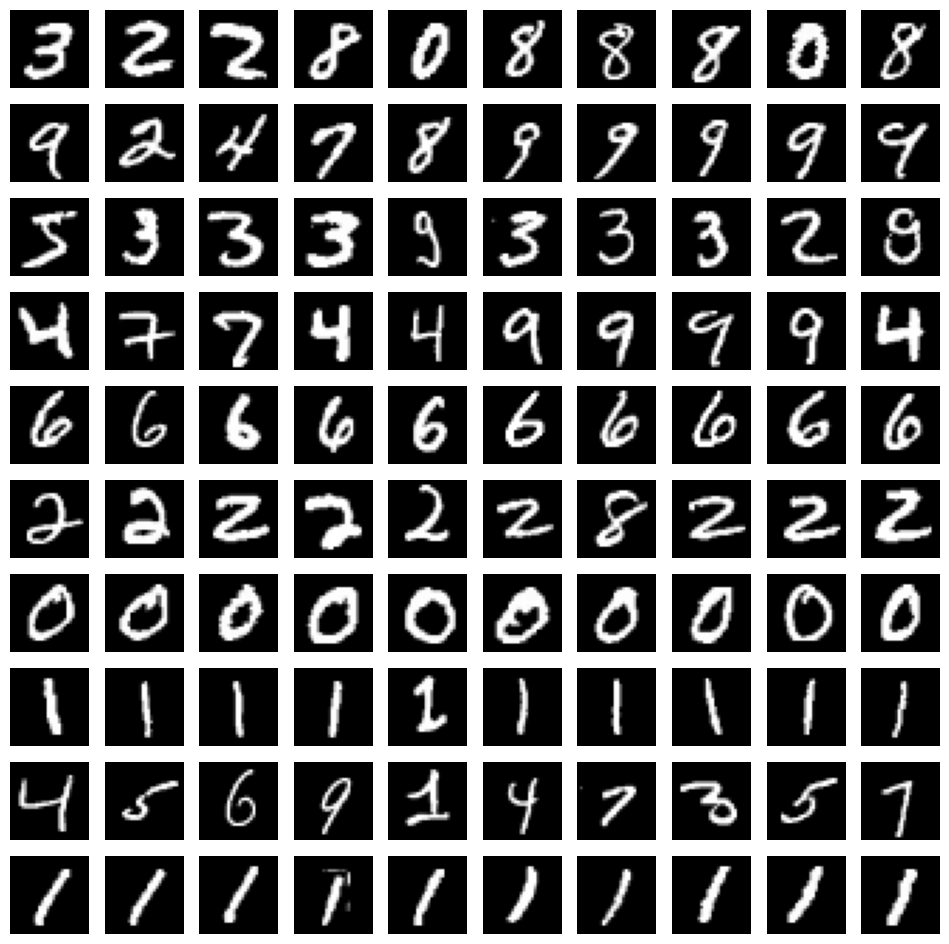

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))

for i in range(10):
    images = train_X[kmeans.labels_ == i]
    for c in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28, 28), cmap='gray')
        plt.axis('off')
        
plt.show()

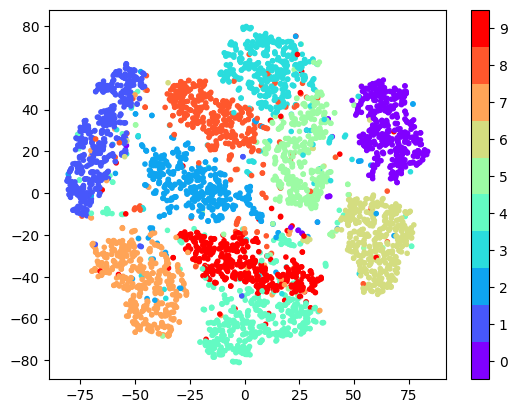

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

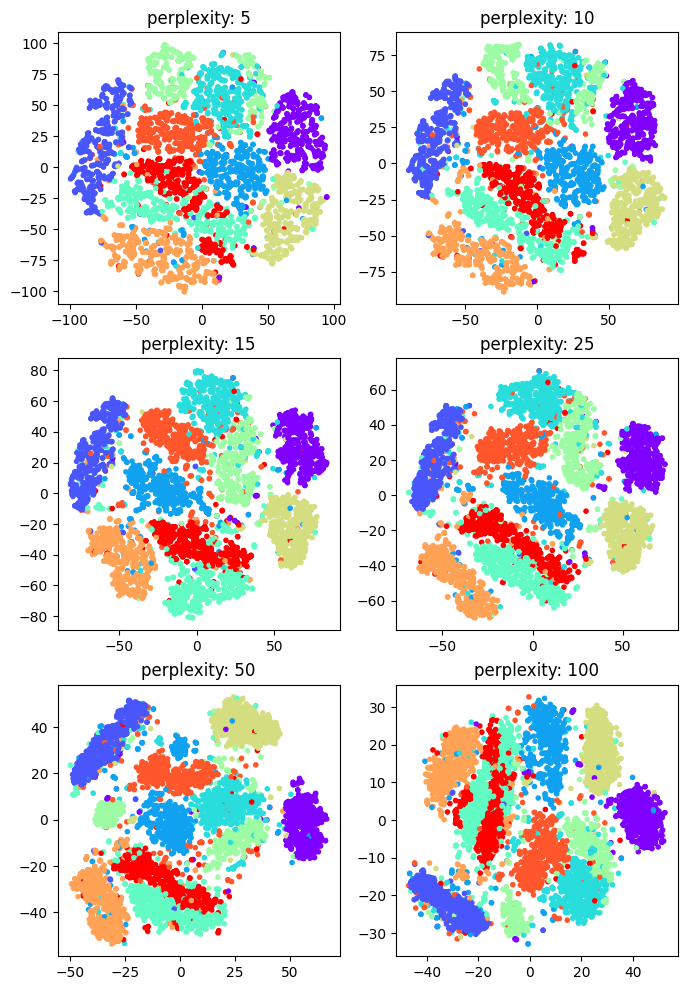

In [44]:
perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize=(8, 12))

for c in range(6):
    tsne = TSNE(n_components=2, learning_rate = 100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:5000])
    
    plt.subplot(3, 2, c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
    plt.title('perplexity: {0}'.format(perplexities[c]))
    
plt.show()

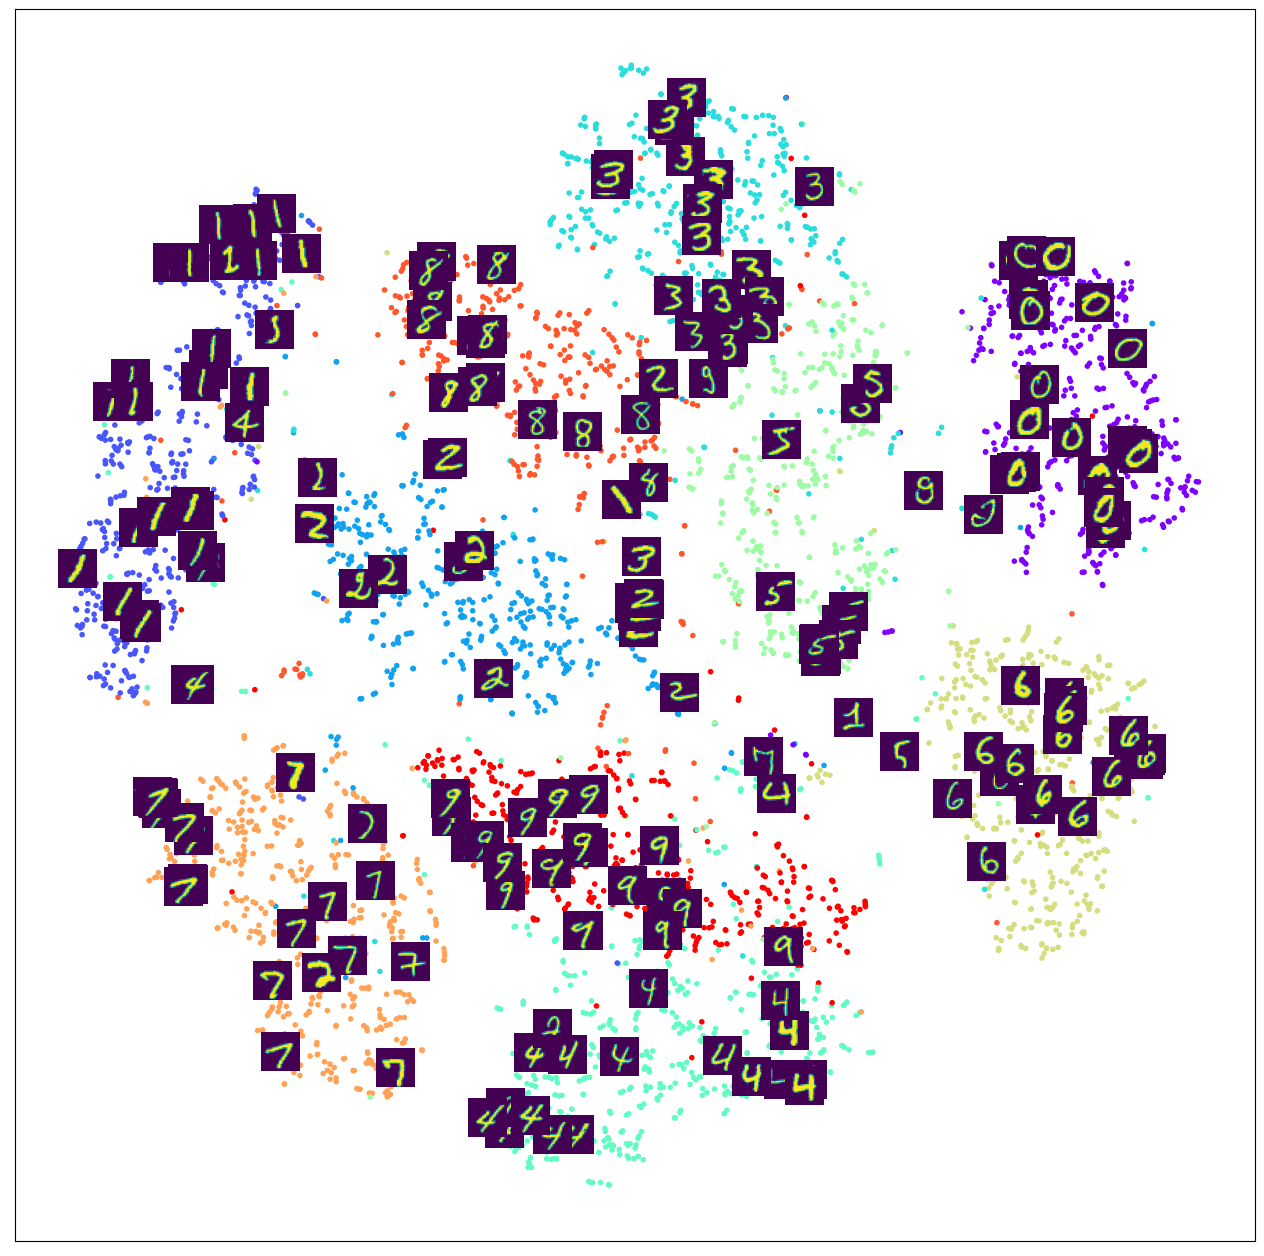

In [48]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16, 16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
for i in range(200):
    imagebox = OffsetImage(train_X[i].reshape(28, 28))
    ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
    ax.add_artist(ab)
    
ax.set_xticks([])
ax.set_yticks([])
plt.show()